# Continuous Control

---

Train a robotic arm to reach target locations.

### 1. Start the Environment

Begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher_Windows_x86_64/Reacher.exe")
```

In [3]:
env = UnityEnvironment(file_name = "Reacher_Windows_x86_64/Reacher.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here, we check for the first brain available, and set it as the default brain we'll be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

***(Uncomment the code to try)***

Next, use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, we'll watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows to observe the agent, as it moves through the environment.  

In [6]:
#### for each agent (for multiple agents network)

#env_info = env.reset(train_mode = False)[brain_name]     # reset the environment    
#states = env_info.vector_observations                    # get the current state
#scores = np.zeros(num_agents)                            # initialize the score

#while True:
#    actions = np.random.randn(num_agents, action_size)   # select an action
#    actions = np.clip(actions, -1, 1)                    # ensure all actions to be b/w -1 and 1
#    env_info = env.step(actions)[brain_name]             # send all actions to the environment
#    next_states = env_info.vector_observations           # get next state
#    rewards = env_info.rewards                           # get reward
#    dones = env_info.local_done                          # see if episode has finished
#    scores += rewards                                    # update the score
#    states = next_states                                 # roll over states to next time step
    
#    if np.any(dones):                                    # exit loop if episode finished
#        break
        
#print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [7]:
# env.close() # avoid closing to further train the agent on environment with DQN

## 4. DDPG implementation

This implementation deals with making the agent to be able to use its experience to gradually choose better actions when interacting with the environment!

Unlike the previous run, when training the environment, `train_mode = True` should be set:

```python
env_info = env.reset(train_mode=True)[brain_name]
```

It takes into account the presence of many agents. In particular, the agents must get an average score of +30 (over 100 consecutive episodes, and over all agents). Specifically,

- After each episode, we add up the rewards that each agent received (without discounting), to get a score for each agent. This yields 20 (potentially different) scores. We then take the average of these 20 scores.
- This yields an average score for each episode (where the average is over all 20 agents).

#### 4.1 Import some necessary packages

In [8]:
#Some packages may be already imported
from agent import Agent
from collections import deque
import torch

import matplotlib.pyplot as plt
%matplotlib inline

#### 4.2 Define a DQN model

Run the code cell below to train the agent from scratch or skip to the next step **Instantiate the Agent** & then **4.3 Watch a Smart Agent!**, to load the saved weights from a pre-trained agent & watch the agent.

Alternatively, load the model along with the saved weights into a different solution file such that one doesn't need to build a model from scratch.

In [9]:
def ddpg(epochs = 1000, max_t = 1000, print_every = 1):
    
    scores = []                                                 # list containing scores from each episode
    scores_window = deque(maxlen = 100)                         # last 100 scores
    for i_episode in range(1, epochs + 1):
        env_info = env.reset(train_mode = True)[brain_name]     # reset the environment    
        state = env_info.vector_observations[0]                 # get the current state
        #agent.reset()                                           # uncomment when add_noise = True
        score = 0                                               # initialize the score
        
        for t in range(max_t):
            action = agent.act(state, add_noise = False)         # select an action
            env_info = env.step(action)[brain_name]             # send action to the environment
            next_state = env_info.vector_observations[0]        # get next state
            reward = env_info.rewards[0]                        # get reward
            done = env_info.local_done[0]                       # see if episode finished
            agent.step(state, action, reward, next_state, done) # append experience to buffer
            
            state = next_state                                  # roll over state to next time step
            score += reward                                     # update the score
           
            if done:                                            # exit loop if episode finished
                break
                
        scores_window.append(score)                             # save most recent score
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if (i_episode % print_every == 0):
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if (np.mean(scores_window) >= 30.0 and i_episode > 100):
            print('Probelm Solved in {} episodes'.format(i_episode - 100))
            
            ckp1 = { 'state_size': 33,
                      'action_size': 4,
                      'hidden_layers': [256, 256],
                      'state_dict': agent.actor_local.state_dict() }
            ckp2 = { 'state_size': 33,
                      'action_size': 4,
                      'hidden_layers': [256, 256],
                      'state_dict': agent.critic_local.state_dict() }
            torch.save(ckp1, 'ckp_actor.pt')
            torch.save(ckp2, 'ckp_critic.pt')
            
            break
            
    return scores

**Instantiate the agent**

In [10]:
agent = Agent(state_size = 33, action_size = 4, seed = 0)

**Train the agent**

Episode 1	Average Score: 0.54
Episode 2	Average Score: 0.62
Episode 3	Average Score: 0.46
Episode 4	Average Score: 0.37
Episode 5	Average Score: 0.32
Episode 6	Average Score: 0.38
Episode 7	Average Score: 0.36
Episode 8	Average Score: 0.40
Episode 9	Average Score: 0.49
Episode 10	Average Score: 0.47
Episode 11	Average Score: 0.47
Episode 12	Average Score: 0.43
Episode 13	Average Score: 0.40
Episode 14	Average Score: 0.44
Episode 15	Average Score: 0.41
Episode 16	Average Score: 0.40
Episode 17	Average Score: 0.40
Episode 18	Average Score: 0.42
Episode 19	Average Score: 0.40
Episode 20	Average Score: 0.41
Episode 21	Average Score: 0.49
Episode 22	Average Score: 0.50
Episode 23	Average Score: 0.49
Episode 24	Average Score: 0.51
Episode 25	Average Score: 0.50
Episode 26	Average Score: 0.50
Episode 27	Average Score: 0.50
Episode 28	Average Score: 0.51
Episode 29	Average Score: 0.49
Episode 30	Average Score: 0.50
Episode 31	Average Score: 0.49
Episode 32	Average Score: 0.51
Episode 33	Averag

Episode 261	Average Score: 10.08
Episode 262	Average Score: 10.14
Episode 263	Average Score: 10.17
Episode 264	Average Score: 10.17
Episode 265	Average Score: 10.23
Episode 266	Average Score: 10.28
Episode 267	Average Score: 10.41
Episode 268	Average Score: 10.44
Episode 269	Average Score: 10.42
Episode 270	Average Score: 10.40
Episode 271	Average Score: 10.53
Episode 272	Average Score: 10.59
Episode 273	Average Score: 10.73
Episode 274	Average Score: 10.85
Episode 275	Average Score: 10.94
Episode 276	Average Score: 11.06
Episode 277	Average Score: 11.18
Episode 278	Average Score: 11.22
Episode 279	Average Score: 11.33
Episode 280	Average Score: 11.39
Episode 281	Average Score: 11.48
Episode 282	Average Score: 11.51
Episode 283	Average Score: 11.60
Episode 284	Average Score: 11.69
Episode 285	Average Score: 11.84
Episode 286	Average Score: 11.94
Episode 287	Average Score: 12.07
Episode 288	Average Score: 12.22
Episode 289	Average Score: 12.32
Episode 290	Average Score: 12.40
Episode 29

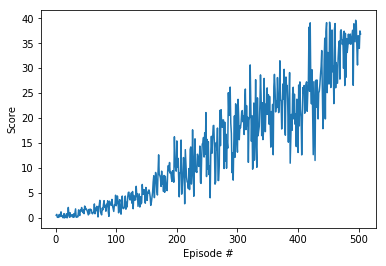

In [11]:
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores) + 1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#### 4.3 Watch a Smart Agent

Load the trained weights from file to watch a smart agent!

In [1]:
# load the weights from file
ckp1 = torch.load('ckp_actor.pt')
agent.actor_local.load_state_dict(ckp1['state_dict'])

ckp2 = torch.load('ckp_critic.pt')
agent.critic_local.load_state_dict(ckp2['state_dict'])

env_info = env.reset(train_mode = False)[brain_name]     # reset the environmen    
state = env_info.vector_observations[0]                  # get the current state
score = 0                                                # initialize the score

while True:
    action = agent.act(state, add_noise = False)         # select an action
    env_info = env.step(action)[brain_name]              # send action to the environment
    next_state = env_info.vector_observations[0]         # get next state
    reward = env_info.rewards[0]                         # get reward
    done = env_info.local_done                           # see if episode finished
    state = next_state                                   # roll over state to next time step
    score += reward                                      # update the score
    
    if done:                                             # exit loop if episode finished
        break

env.close()
        
print("Score in 300 steps:", score)